## Reinforcement Learning

Reinforcement learning merupakan salah satu jenis machine learning dimana suatu agent melakukan aksi terhadap lingkungannya, kemudian agent akan menerima reward atau penalty terhadap aksi yang telah dilakukannya. Tujuan akhir dari interaksi tersebut adalah membuat agent berperilaku sedemikian sehingga dapat memaksimalkan reward yang diterima.


### Wumpus World
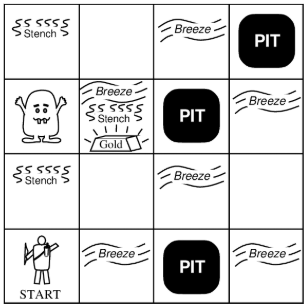



In [30]:
import environment as env
import agent as ag
import time

## Agent Q-Learning

In [31]:
env = env.Environment()
agent = ag.Agent(algorithm="Qlearn")
episodes = 700 # Jumlah episode pelatihan

for episode in range(episodes):
    # Reset lingkungan di awal setiap episode
    state, _, done = env.reset()
    
    # Loop di dalam episode hingga selesai
    while not done:
        # Agen memilih aksi
        action = agent.chooseAction(state)
        
        # Eksekusi step action dan kembalikan reward pada agent
        nextState, reward, done = env.step(action)
        
        # Agen belajar dari pengalaman (update Q-table)
        agent.learn(state, action, reward, nextState, done)
        
        # Pindah ke keadaan berikutnya
        state = nextState
        
    # Perbarui epsilon setelah episode selesai
    agent.updateEpsilon()

    # Tampilkan progress setiap 100 episode
    if (episode + 1) % 100 == 0:
        print(f"Episode {episode + 1}/{episodes} selesai. Epsilon: {agent.epsilon:.2f}")


Episode 100/700 selesai. Epsilon: 0.90
Episode 200/700 selesai. Epsilon: 0.82
Episode 300/700 selesai. Epsilon: 0.74
Episode 400/700 selesai. Epsilon: 0.67
Episode 500/700 selesai. Epsilon: 0.61
Episode 600/700 selesai. Epsilon: 0.55
Episode 700/700 selesai. Epsilon: 0.50


### Tampilan Q Table

In [32]:
# important State
importantStates = [
    (3,0,'Utara',(), False),
    (3,0,'Barat',(), True),
    (1, 1, 'Utara', ('Breeze', 'Glitter', 'Stench'), False),
    (1, 1, 'Utara', ('Breeze', 'Stench'), True)]

for state in importantStates:
    agent.displayStateQValue(state)

# Q Table Keseluruhan
agent.displayQTable()

------------------------------------------------------------
State: (3, 0, 'Utara', (), False)
    - turnLeft: 688.27
    - turnRight: 688.16
    - moveForward: 764.62  <-- Optimal
    - grab: 724.59
    - climb: -1.00
------------------------------------------------------------
State: (3, 0, 'Barat', (), True)
    - turnLeft: -1.59
    - turnRight: -1.20
    - moveForward: -1.52
    - grab: -1.92
    - climb: -1.00  <-- Optimal
------------------------------------------------------------
State: (1, 1, 'Utara', ('Breeze', 'Glitter', 'Stench'), False)
    - turnLeft: 900.25
    - turnRight: 900.47
    - moveForward: 527.59
    - grab: 993.68  <-- Optimal
    - climb: 937.11
------------------------------------------------------------
State: (1, 1, 'Utara', ('Breeze', 'Stench'), True)
    - turnLeft: -5.66  <-- Optimal
    - turnRight: -5.69
    - moveForward: -5.76
    - grab: -6.62
    - climb: -6.83

=== FINAL Q-TABLE ===
Ukuran Q-Table: 120 entri
-------------------------------------

### Action Path Agent Hasil Training

In [33]:
print("\n\n=== Penampilan Action Path dari Agent Q-Learning yang terlatih ===")
# Inisialisasi
env.reset()
state = env.getState()
env.displayGrid()
time.sleep(0.5) # Jeda untuk tampilan
# Set epsilon ke 0 untuk eksploitasi penuh
agent.epsilon = 0 

while not env.isEndGame:
    action = agent.chooseAction(state)
    env.step(action)
    state = env.getState()
    env.displayGrid()
    time.sleep(0.5) # Jeda untuk tampilan

print("\n=== Hasil Akhir ===")
print(f"Total Poin: {env.poin}")
if env.agentClimbOut and env.isGrabGold:
    print("Misi Selesai: Emas diambil dan agen keluar dengan selamat.")
else:
    print("Misi Gagal: Agen tidak berhasil.")



=== Penampilan Action Path dari Agent Q-Learning yang terlatih ===
+-----------------+-----------------+-----------------+-----------------+
|        S        |                 |        B        |        P        |
+-----------------+-----------------+-----------------+-----------------+
|        W        |     B, G, S     |        P        |        B        |
+-----------------+-----------------+-----------------+-----------------+
|        S        |                 |        B        |                 |
+-----------------+-----------------+-----------------+-----------------+
|        A        |        B        |        P        |        B        |
+-----------------+-----------------+-----------------+-----------------+
Arah agen: Utara
Poin saat ini: 0
Emas sudah diambil: False
Game berakhir: False

--- Aksi : moveForward ---
+-----------------+-----------------+-----------------+-----------------+
|        S        |                 |        B        |        P        |
+-------

## Agent Sarsa

In [34]:
import agent as ag
env.reset()
agent = ag.Agent(algorithm="Sarsa")
episodes = 1800

for episode in range(episodes):
    state, _, done = env.reset()
    action = agent.chooseAction(state)

    while not done:
        nextState, reward, done = env.step(action)
        
        if not done:
            nextAction = agent.chooseAction(nextState)
        else:
            nextAction = None # Tidak ada nextAction di keadaan final

        agent.learn(state, action, reward, nextState, done, nextAction)
        
        state = nextState
        action = nextAction
    
    agent.updateEpsilon()
    if (episode + 1) % 100 == 0:
        print(f"Episode {episode + 1}/{episodes} selesai. Epsilon: {agent.epsilon:.2f}")


Episode 100/1800 selesai. Epsilon: 0.90
Episode 200/1800 selesai. Epsilon: 0.82
Episode 300/1800 selesai. Epsilon: 0.74
Episode 400/1800 selesai. Epsilon: 0.67
Episode 500/1800 selesai. Epsilon: 0.61
Episode 600/1800 selesai. Epsilon: 0.55
Episode 700/1800 selesai. Epsilon: 0.50
Episode 800/1800 selesai. Epsilon: 0.45
Episode 900/1800 selesai. Epsilon: 0.41
Episode 1000/1800 selesai. Epsilon: 0.37
Episode 1100/1800 selesai. Epsilon: 0.33
Episode 1200/1800 selesai. Epsilon: 0.30
Episode 1300/1800 selesai. Epsilon: 0.27
Episode 1400/1800 selesai. Epsilon: 0.25
Episode 1500/1800 selesai. Epsilon: 0.22
Episode 1600/1800 selesai. Epsilon: 0.20
Episode 1700/1800 selesai. Epsilon: 0.18
Episode 1800/1800 selesai. Epsilon: 0.17


### Q-Table

In [35]:
# important State
importantStates = [
    (3,0,'Utara',(), False),
    (3,0,'Barat',(), True),
    (1, 1, 'Utara', ('Breeze', 'Glitter', 'Stench'), False),
    (1, 1, 'Utara', ('Breeze', 'Stench'), True)]

for state in importantStates:
    agent.displayStateQValue(state)

# Q Table Keseluruhan
agent.displayQTable()

agent.displayQTable()

------------------------------------------------------------
State: (3, 0, 'Utara', (), False)
    - turnLeft: 251.55
    - turnRight: 253.75
    - moveForward: 492.99  <-- Optimal
    - grab: 227.27
    - climb: -1.00
------------------------------------------------------------
State: (3, 0, 'Barat', (), True)
    - turnLeft: -2.23
    - turnRight: -1.88
    - moveForward: -2.10
    - grab: -2.92
    - climb: -1.00  <-- Optimal
------------------------------------------------------------
State: (1, 1, 'Utara', ('Breeze', 'Glitter', 'Stench'), False)
    - turnLeft: 666.70
    - turnRight: 828.13
    - moveForward: 467.64
    - grab: 981.61  <-- Optimal
    - climb: 922.08
------------------------------------------------------------
State: (1, 1, 'Utara', ('Breeze', 'Stench'), True)
    - turnLeft: -82.35
    - turnRight: -22.31
    - moveForward: -15.13  <-- Optimal
    - grab: -28.65
    - climb: -22.37

=== FINAL Q-TABLE ===
Ukuran Q-Table: 120 entri
--------------------------------

### Action Path

In [36]:

print("\n\n=== Penampilan Action Path dari Agent Sarsa yang terlatih ===")
env.reset()
state = env.getState()
env.displayGrid()
time.sleep(1)

agent.epsilon = 0 
while not env.isEndGame:
    action = agent.chooseAction(state)
    env.step(action)
    state = env.getState()
    env.displayGrid()
    time.sleep(1)

print("\n--- Hasil Akhir ---")
print(f"Total Poin: {env.poin}")
if env.agentClimbOut and env.isGrabGold:
    print("Misi Selesai: Emas diambil dan agen keluar dengan selamat.")
else:
    print("Misi Gagal: Agen tidak berhasil.")



=== Penampilan Action Path dari Agent Sarsa yang terlatih ===
+-----------------+-----------------+-----------------+-----------------+
|        S        |                 |        B        |        P        |
+-----------------+-----------------+-----------------+-----------------+
|        W        |     B, G, S     |        P        |        B        |
+-----------------+-----------------+-----------------+-----------------+
|        S        |                 |        B        |                 |
+-----------------+-----------------+-----------------+-----------------+
|        A        |        B        |        P        |        B        |
+-----------------+-----------------+-----------------+-----------------+
Arah agen: Utara
Poin saat ini: 0
Emas sudah diambil: False
Game berakhir: False

--- Aksi : moveForward ---
+-----------------+-----------------+-----------------+-----------------+
|        S        |                 |        B        |        P        |
+------------